In [6]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
data = pd.read_csv('Finalised_Total_Reviews.csv')
data.columns = [x.lower() for x in data.columns]
data.head()

,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know
0,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5.0,"""Exceptional Experience at M Social Hotel”",I had a similarly extraordinary experience dur...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
1,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5.0,Armando at the front desk,Armando of the front desk was kind enough to l...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
2,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5.0,The best stay experience in Singapore,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
3,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5.0,A much needed STAYCATION,I have been frequenting M Social every time I ...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
4,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5.0,Super location super staff .,Excellent location great hotel... especially A...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."


Here, we'll filter out only relevant columns that is needed for sentiment analysis.

In [8]:
# get relevant info only for sentiment analysis
df = data.filter(['name', 'average_rating', 'rating', 'comment_content', 'date'], axis = 1)
df.head()

,name,average_rating,rating,comment_content,date
0,M Social Singapore,4.0,5.0,I had a similarly extraordinary experience dur...,Date of stay: September 2023
1,M Social Singapore,4.0,5.0,Armando of the front desk was kind enough to l...,Date of stay: September 2023
2,M Social Singapore,4.0,5.0,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023
3,M Social Singapore,4.0,5.0,I have been frequenting M Social every time I ...,Date of stay: September 2023
4,M Social Singapore,4.0,5.0,Excellent location great hotel... especially A...,Date of stay: September 2023


In [9]:
df.count()

name               51709
average_rating     51709
rating             51709
comment_content    51709
date               51699
dtype: int64

In [10]:
df.dropna(inplace=True)
df.count()

name               51699
average_rating     51699
rating             51699
comment_content    51699
date               51699
dtype: int64

In [11]:
from datetime import datetime
df['date'] = [str(x).replace('Date of stay: ', '') for x in df['date']]

df['date'] = [datetime.strptime(date, '%B %Y') for date in df['date']]
df.head()

,name,average_rating,rating,comment_content,date
0,M Social Singapore,4.0,5.0,I had a similarly extraordinary experience dur...,2023-09-01 00:00:00
1,M Social Singapore,4.0,5.0,Armando of the front desk was kind enough to l...,2023-09-01 00:00:00
2,M Social Singapore,4.0,5.0,We spend two wonderful nights at M Social Sing...,2023-09-01 00:00:00
3,M Social Singapore,4.0,5.0,I have been frequenting M Social every time I ...,2023-09-01 00:00:00
4,M Social Singapore,4.0,5.0,Excellent location great hotel... especially A...,2023-09-01 00:00:00


In [12]:
# allow user to select hotel name
hotel_name = 'M Social Singapore'

In [13]:
df = df[df.loc[:, ['name']].values == hotel_name]

In [14]:
df['rating'].value_counts()

5.0    125
4.0     13
3.0      9
1.0      9
2.0      4
Name: rating, dtype: int64

In [15]:
# instantiate the analyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
# create new column consisting of sentiment scores
df['scores'] = df['comment_content'].apply(lambda review: analyzer.polarity_scores(review))
df['compound_score'] = df['scores'].apply(lambda d:d['compound'])

In [17]:
def sentiment(score):
    if score > 0.25:
        # pos
        return 'pos'
    elif score < -0.25:
        # neg
        return 'neg'
    else:
        # neutral
        return 'neu'

df['sentiment'] = df['compound_score'].apply(sentiment)

In [18]:
def sentiment_num(score):
    if score > 0.25:
        # pos
        return 1
    elif score < -0.25:
        # neg
        return -1
    else:
        # neutral
        return 0

df['sentiment_num'] = df['compound_score'].apply(sentiment_num)

In [19]:
df.head()

,name,average_rating,rating,comment_content,date,scores,compound_score,sentiment,sentiment_num
0,M Social Singapore,4.0,5.0,I had a similarly extraordinary experience dur...,2023-09-01 00:00:00,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.9894,pos,1
1,M Social Singapore,4.0,5.0,Armando of the front desk was kind enough to l...,2023-09-01 00:00:00,"{'neg': 0.037, 'neu': 0.799, 'pos': 0.164, 'co...",0.8689,pos,1
2,M Social Singapore,4.0,5.0,We spend two wonderful nights at M Social Sing...,2023-09-01 00:00:00,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.9893,pos,1
3,M Social Singapore,4.0,5.0,I have been frequenting M Social every time I ...,2023-09-01 00:00:00,"{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.9988,pos,1
4,M Social Singapore,4.0,5.0,Excellent location great hotel... especially A...,2023-09-01 00:00:00,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.7003,pos,1


We check for the reviews where the program identifies as 'Neutral'. Here, we get to compare the sentiment against the rating. Sometimes, users may leave a neutral review but rate 4.0 or above, implying a "positive" rating.

In [20]:
# check which columns are neutral
df.loc[df['sentiment'] == 'neu']

,name,average_rating,rating,comment_content,date,scores,compound_score,sentiment,sentiment_num
67,M Social Singapore,4.0,3.0,Front desk staffs are rude and arrogant. They ...,2023-08-01 00:00:00,"{'neg': 0.187, 'neu': 0.64, 'pos': 0.173, 'com...",-0.1706,neu,0
82,M Social Singapore,4.0,2.0,Poor check in process Ignorant staffs includin...,2023-07-01 00:00:00,"{'neg': 0.222, 'neu': 0.586, 'pos': 0.193, 'co...",-0.1689,neu,0
116,M Social Singapore,4.0,3.0,This is a minimalist hotel - in every sense of...,2023-04-01 00:00:00,"{'neg': 0.069, 'neu': 0.862, 'pos': 0.069, 'co...",-0.0127,neu,0
135,M Social Singapore,4.0,1.0,Everytime I called front desk to connect me to...,2022-12-01 00:00:00,"{'neg': 0.041, 'neu': 0.896, 'pos': 0.063, 'co...",0.1655,neu,0


In [21]:
df['sentiment']

0      pos
1      pos
2      pos
3      pos
4      pos
      ... 
155    pos
156    pos
157    pos
158    pos
159    pos
Name: sentiment, Length: 160, dtype: object

In [22]:
fig = px.histogram(df, x='sentiment')
fig.update_xaxes(categoryorder='array', categoryarray= ['neg', 'neu', 'pos'])
fig.show()

#WordCloud

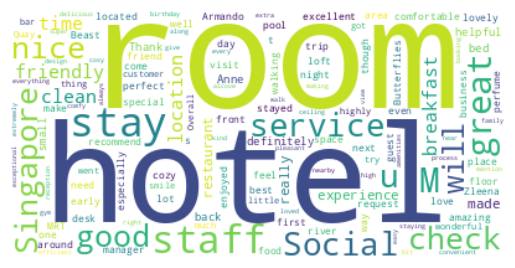

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

text = ''.join(comment for comment in df['comment_content'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Benchmarking

In [24]:
# compare across dataframe
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
def senti(x):
    if x > 3.0:
        return 'pos'
    elif x == 3.0:
        return 'neu'
    else:
        return 'neg'

df['rating'] = df['rating'].apply(senti)

In [26]:
df['rating'].value_counts()

pos    138
neg     13
neu      9
Name: rating, dtype: int64

In [27]:
# random guessing is a 50% percent chance
# if accuracy > 0.5, model is good
accuracy_score(df['rating'], df['sentiment'])

0.93125

In [28]:
print(classification_report(df['rating'], df['sentiment']))

              precision    recall  f1-score   support

         neg       1.00      0.69      0.82        13
         neu       0.50      0.22      0.31         9
         pos       0.94      1.00      0.97       138

    accuracy                           0.93       160
   macro avg       0.81      0.64      0.70       160
weighted avg       0.92      0.93      0.92       160

